<a href="https://colab.research.google.com/github/Shre-05/ShadowX/blob/main/ShadowX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python pillow pycuda scikit-image # type: ignore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp310-cp310-linux_x86_64.whl size=660544 sha256=5b5b9b476b115f3f9e9c40a3536202f19f000d49baba163b91abb542ad5eb203
  Stored in directory: /root/.cache/pip/wheels/70/63/40/4bf006182f942d3516b71bb2ff3b57ccbdb8b2c0ee81882b6e
Successfully built pycuda


# New section

In [ ]:
%pip install geotile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 19.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive # type: ignore
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

In [ ]:
zip_file_path = 'https://drive.google.com/file/d/1332pDEyjFFi3WuOpePcQCnlr3mJOAJxC/view?usp=drive_link'

In [ ]:
extracted_folder = '/content/extracted_tiff_images'

In [ ]:
os.makedirs(extracted_folder, exist_ok=True)

In [ ]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving archive (9).zip to archive (9).zip


In [ ]:
   import zipfile
   import os

   # Specify the name of the uploaded ZIP file (use the exact name displayed when you uploaded)
   zip_file_path = 'archive (9).zip'  # Replace with the actual uploaded file name
   extracted_folder = '/content/extracted_tiff_images'

   # Create the extraction directory if it doesn't exist
   os.makedirs(extracted_folder, exist_ok=True)

   # Unzip the file
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
       zip_ref.extractall(extracted_folder)

   print(f"Extracted files to: {extracted_folder}")

Extracted files to: /content/extracted_tiff_images


In [ ]:
   import glob

   # List all extracted TIFF files
   tiff_files = glob.glob(f"{extracted_folder}/*.tif")
   print(f"Number of TIFF images extracted: {len(tiff_files)}")
   for tiff in tiff_files:
       print(tiff)

Number of TIFF images extracted: 0


In [ ]:
   # Change the pattern to match the image formats you're using
   image_files = glob.glob(f"{extracted_folder}/*.jpg") + glob.glob(f"{extracted_folder}/*.png")

   print(f"Number of image files extracted: {len(image_files)}")
   for image in image_files:
       print(image)

Number of image files extracted: 8
/content/extracted_tiff_images/download (3).jpg
/content/extracted_tiff_images/moon 1.jpg
/content/extracted_tiff_images/download (1).jpg
/content/extracted_tiff_images/download (4).jpg
/content/extracted_tiff_images/moon 3.jpg
/content/extracted_tiff_images/lunar creter (2).jpg
/content/extracted_tiff_images/download (5).jpg
/content/extracted_tiff_images/download (2).jpg


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

def create_low_light_enhancement_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))

    # Reshape the output to match the input shape
    model.add(layers.Reshape(input_shape))

    return model

# Example usage
input_shape = (128, 128, 3)  # Example input shape for images of size 128x128 with 3 color channels
model = create_low_light_enhancement_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 49152)               │       6,340,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,646,144 (36.80 MB)

 Trainable params: 9,645,696 (36.80 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
pip install numpy opencv-python matplotlib

In [ ]:
import os

# Define the dataset path
dataset_path = 'dataset'
low_light_path = os.path.join(dataset_path, 'low_light')
enhanced_path = os.path.join(dataset_path, 'enhanced')

# Create directories if they do not exist
os.makedirs(low_light_path, exist_ok=True)
os.makedirs(enhanced_path, exist_ok=True)

print(f"Directories created: {low_light_path}, {enhanced_path}")

Directories created: dataset/low_light, dataset/enhanced


In [ ]:
# Set paths to the low_light and enhanced image directories
low_light_dir = 'dataset/low_light/'
enhanced_dir = 'dataset/enhanced/'

In [ ]:
# Load images function
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

# Load images again
train_images = load_images_from_folder(low_light_dir)  # Low-light images
train_labels = load_images_from_folder(enhanced_dir)    # Corresponding enhanced images

# Check the number of loaded images
print(f'Loaded {len(train_images)} low-light images and {len(train_labels)} enhanced images.')

Loaded 5 low-light images and 5 enhanced images.


In [ ]:
# Define the target size
target_size = (128, 128)  # Width, Height

# Resize all images
train_images_resized = [cv2.resize(img, target_size) for img in train_images]
train_labels_resized = [cv2.resize(img, target_size) for img in train_labels]

print(f'Successfully resized images to {target_size}.')

Successfully resized images to (128, 128).


In [ ]:
# Normalize pixel values to [0, 1]
train_images_normalized = np.array(train_images_resized) / 255.0
train_labels_normalized = np.array(train_labels_resized) / 255.0

print(f'Normalization completed.')

Normalization completed.


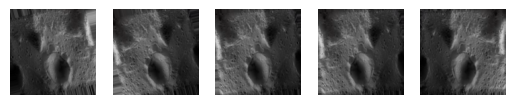

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15
)

# Example of generating augmented images from the first original image
augmented_images = datagen.flow(np.expand_dims(train_images_normalized[0], axis=0), batch_size=1)

# Display a few augmented images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    augmented_image = next(augmented_images)[0]
    plt.imshow(augmented_image)
    plt.axis('off')
plt.show()

In [ ]:
# Check dimensions and types
print('Train Images Normalized Shape:', train_images_normalized.shape)
print('Train Labels Normalized Shape:', train_labels_normalized.shape)

Train Images Normalized Shape: (5, 128, 128, 3)
Train Labels Normalized Shape: (5, 128, 128, 3)


In [ ]:
import os
import shutil  # For copying images, if needed

# Define the path for the test dataset
test_dataset_dir = 'test_dataset/'
low_light_dir = os.path.join(test_dataset_dir, 'low_light/')
enhanced_dir = os.path.join(test_dataset_dir, 'enhanced/')

# Create directories for low-light and enhanced images
os.makedirs(low_light_dir, exist_ok=True)
os.makedirs(enhanced_dir, exist_ok=True)

print(f"Test dataset directories created:\n - {low_light_dir}\n - {enhanced_dir}")

# (Optional) Copy placeholder images to the low_light directory for testing
# Uncomment and modify the paths to copy actual images if needed
# source_images_dir = 'path_to_your_source_images/'
# for image_name in os.listdir(source_images_dir):
#     shutil.copy(os.path.join(source_images_dir, image_name), low_light_dir)

print("You can now add your test low-light images to the directory.")

Test dataset directories created:
 - test_dataset/low_light/
 - test_dataset/enhanced/
You can now add your test low-light images to the directory.


In [ ]:
# Set path for the test images
test_low_light_dir = 'test_dataset/low_light/'

# Load test images
test_images = load_images_from_folder(test_low_light_dir)

# Resize and normalize test images
test_images_resized = [cv2.resize(img, target_size) for img in test_images]
test_images_normalized = np.array(test_images_resized) / 255.0

# Check dimensions of test images
print(f'Test Images Normalized Shape: {test_images_normalized.shape}')

Test Images Normalized Shape: (3, 128, 128, 3)


In [ ]:
# Import Required Libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

# Define Constants
train_low_light_dir = 'dataset/low_light/'
train_enhanced_dir = 'dataset/enhanced/'

test_low_light_dir = 'test_dataset/low_light/'
test_enhanced_dir = 'test_dataset/enhanced/'

image_height, image_width = 256, 256

# Load and Preprocess Images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_width, image_height))
            images.append(img)
    return np.array(images)

# Load training images
train_images = load_images_from_folder(train_low_light_dir) / 255.0
train_labels = load_images_from_folder(train_enhanced_dir) / 255.0

# Load test images
test_images = load_images_from_folder(test_low_light_dir) / 255.0

# Define the Model
def build_model():
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(3, (3, 3), padding='same')  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create the Model
model = build_model()

# Train the Model
epochs = 50
batch_size = 32
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

# Save the Model
model.save('low_light_enhancement_model.h5')

# Make Predictions on Test Data
predicted_images = model.predict(test_images)

# Post-process predictions (scale to [0, 255])
predicted_images_uint8 = (predicted_images * 255.0).astype(np.uint8)

# Display Results
plt.figure(figsize=(12, 6))
for i in range(min(5, len(test_images))):  # Display up to 5 images
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title('Enhanced')
    plt.axis('off')

    plt.subplot(3, 5, 5 + i + 1)
    plt.imshow(predicted_images_uint8[i])
    plt.title('Low-Light')
    plt.axis('off')

    if len(os.listdir(test_enhanced_dir)) > 0:
        ground_truth = cv2.imread(os.path.join(test_enhanced_dir, f'test_image{i + 1}_enhanced.jpg'))
        plt.subplot(3, 5, 10 + i + 1)
        plt.imshow(ground_truth)
        plt.title('Ground Truth')
        plt.axis('off')

plt.tight_layout()
plt.show()

# Evaluate Performance Metrics
if len(os.listdir(test_enhanced_dir)) > 0:
    ground_truth = cv2.imread(os.path.join(test_enhanced_dir, 'test_image1_enhanced.jpg'))
    psnr = compare_psnr(ground_truth, predicted_images_uint8[0])
    ssim = compare_ssim(ground_truth, predicted_images_uint8[0], multichannel=True)
    print(f'Image 1 - PSNR: {psnr:.2f}, SSIM: {ssim:.4f}')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/low_light/'

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(3, (3, 3), padding='same')  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Create the model
model = build_model()

In [ ]:
# Define training parameters
epochs = 50
batch_size = 32

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

# Save the model after training
model.save('low_light_enhancement_model.h5')

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.2199 - mae: 0.4052 - val_loss: 0.1382 - val_mae: 0.2837
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.1692 - mae: 0.3428 - val_loss: 0.1174 - val_mae: 0.2635
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 0.1329 - mae: 0.2941 - val_loss: 0.1050 - val_mae: 0.2529
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.1093 - mae: 0.2617 - val_loss: 0.1013 - val_mae: 0.2517
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 0.0990 - mae: 0.2481 - val_loss: 0.1031 - val_mae: 0.2559
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 0.0977 - mae: 0.2464 - val_loss: 0.1014 - val_mae: 0.2554
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.0940 - mae: 0.2430 - val_loss: 0.0974 - val_mae: 0.2514
Epoch 8/50
1/1 [==============================] - 3s 3s/step - loss: 0.0888 - mae: 0.2369 - val_loss: 0.0936 - 

In [ ]:
# Assuming `model` is your trained model
predicted_images = model.predict(test_images_normalized)

1/1 [==============================] - 0s 147ms/step


In [ ]:
# Scale predictions back to [0, 255] and convert to uint8
predicted_images_uint8 = (predicted_images * 255.0).astype(np.uint8)

# Check the shape of the predicted outputs
print(f'Predicted Images Shape: {predicted_images_uint8.shape}')

Predicted Images Shape: (3, 128, 128, 3)


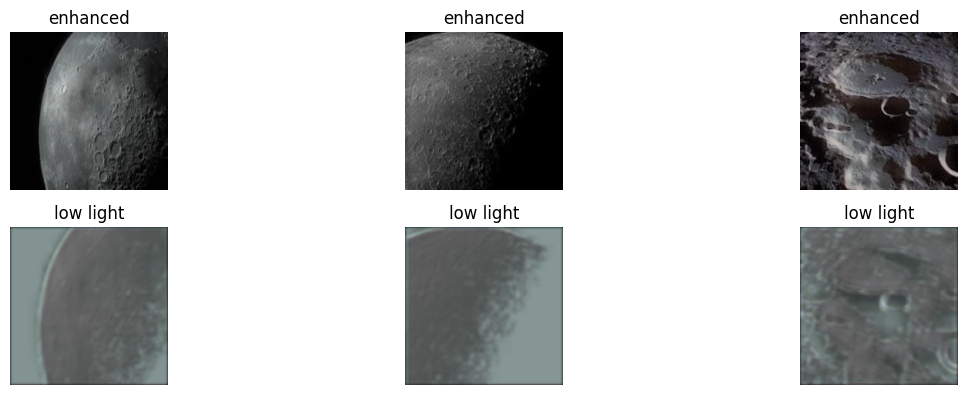

In [ ]:
# Display Results
plt.figure(figsize=(12, 6))
num_images = min(5, len(test_images))  # Use this to limit the number of images displayed
for i in range(num_images):
    # Display low-light image
    plt.subplot(3, num_images, i + 1)
    plt.imshow(test_images[i])
    plt.title('enhanced')
    plt.axis('off')

    # Display enhanced image
    plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(predicted_images_uint8[i])
    plt.title('low light')
    plt.axis('off')

    # Load and display ground truth image
    ground_truth_path = os.path.join(test_enhanced_dir, f'test_image{i + 1}_enhanced.jpg')
    ground_truth = cv2.imread(ground_truth_path)

    if ground_truth is None:
        print(f"Warning: Ground truth image for index {i} could not be loaded.")
    else:
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(ground_truth)
        plt.title('Ground Truth')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
   import os

   new_image_path = 'C:/Users/Lenovo/Desktop/Dataset/low_light'  # Update this to your actual image path
   print("File exists:", os.path.isfile(new_image_path))

File exists: False


In [ ]:
  new_image_path = 'C:/Users/Lenovo/Desktop/Dataset/low_light'  # Use an absolute path

In [ ]:
   # Define the image path
   image_path = 'C:/Users/Lenovo/Desktop/Dataset/low_light'  # Update this with the actual path to your image

In [ ]:
import cv2
import numpy as np

# Define the function for loading and preprocessing the image
def load_and_preprocess_image(image_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Resize to model input size
    img = cv2.resize(img, (256, 256))

    # Normalize the image to [0, 1]
    img = img / 255.0

    # Expand dimensions to match input shape [1, height, width, channels]
    img = np.expand_dims(img, axis=0)
    return img

# Define the path to your new image
image_path = '/content/download (1).jpg'  # Update this to your actual image path

# Load and preprocess the image
try:
    new_image = load_and_preprocess_image(image_path)
    print("Image loaded and preprocessed successfully.")
except ValueError as e:
    print(e)

Image loaded and preprocessed successfully.
